In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Crypto_fine.csv')
df.head()

,Case ID,Date of Action,Regulatory Body,Entity/Individual,Category of Enforcement,Description of Violation,Amount of Fine,Outcome,Relevant Regulations Violated,Links to Official Documents/Press Release
0,3-19500,30/09/2019,SEC,Block.one,Unregistered Securities,Sale of unregistered securities (EOS),24.00,Settlement,Securities Act of 1933,SEC Press Release
1,3-19700,28/05/2020,SEC,BitClave,Unregistered Securities,Sale of unregistered securities (ICO),29.34,Settlement,Securities Act of 1933,SEC Press Release
2,2023-FTC-001,13/07/2023,FTC,Celsius Network,Investor Protection Violations,Misleading investors about the safety of their...,4700.00,Settlement (post-bankruptcy),FTC Act,FTC Press Release
3,3-19750,26/06/2020,SEC,Telegram,Unregistered Securities,Sale of unregistered securities (Gram tokens),1240.00,Settlement,Securities Act of 1933,SEC Press Release
4,3-20200,14/02/2022,SEC,BlockFi,Unregistered Securities,Sale of unregistered securities (interest-bear...,100.00,Settlement,Securities Act of 1933,SEC Press Release


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 10 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Case ID                                    113 non-null    object 
 1   Date of Action                             120 non-null    object 
 2   Regulatory Body                            120 non-null    object 
 3   Entity/Individual                          120 non-null    object 
 4   Category of Enforcement                    120 non-null    object 
 5   Description of Violation                   118 non-null    object 
 6   Amount of Fine                             120 non-null    float64
 7   Outcome                                    119 non-null    object 
 8   Relevant Regulations Violated              111 non-null    object 
 9   Links to Official Documents/Press Release  120 non-null    object 
dtypes: float64(1), object(9)
m

In [4]:
df['Date of Action'] = pd.to_datetime(df['Date of Action'])

In [5]:
df.set_index('Date of Action', inplace=True)

In [6]:
df.head()

,Case ID,Regulatory Body,Entity/Individual,Category of Enforcement,Description of Violation,Amount of Fine,Outcome,Relevant Regulations Violated,Links to Official Documents/Press Release
Date of Action,,,,,,,,,
2019-09-30,3-19500,SEC,Block.one,Unregistered Securities,Sale of unregistered securities (EOS),24.00,Settlement,Securities Act of 1933,SEC Press Release
2020-05-28,3-19700,SEC,BitClave,Unregistered Securities,Sale of unregistered securities (ICO),29.34,Settlement,Securities Act of 1933,SEC Press Release
2023-07-13,2023-FTC-001,FTC,Celsius Network,Investor Protection Violations,Misleading investors about the safety of their...,4700.00,Settlement (post-bankruptcy),FTC Act,FTC Press Release
2020-06-26,3-19750,SEC,Telegram,Unregistered Securities,Sale of unregistered securities (Gram tokens),1240.00,Settlement,Securities Act of 1933,SEC Press Release
2022-02-14,3-20200,SEC,BlockFi,Unregistered Securities,Sale of unregistered securities (interest-bear...,100.00,Settlement,Securities Act of 1933,SEC Press Release


In [7]:
# Aggregate data by month
df_yearly = df.resample('Y').sum()

# Inspect the aggregated data
df_yearly.head()


,Case ID,Regulatory Body,Entity/Individual,Category of Enforcement,Description of Violation,Amount of Fine,Outcome,Relevant Regulations Violated,Links to Official Documents/Press Release
Date of Action,,,,,,,,,
2013-12-31,13-cv-416,SEC,Shavers and Bitcoin Savings and Trust,Litigation,Fraudulent offers and sales of bitcoin-denomin...,40.000000,Amended Final Judgment,Securities Act 17(a); Exchange Act 10(b) and...,https://www.morrisoncohen.com/siteFiles/News/T...
2014-12-31,0,0,0,0,0,0.000000,0,0,0
2015-12-31,0,0,0,0,0,0.000000,0,0,0
2016-12-31,0,0,0,0,0,0.000000,0,0,0
2017-12-31,16-cr-22717-cr-15817-cr-19117-cv-718117-cv-10001,N.D. Cal.D. Conn.W.D. Wash.CFTCS.D.N.Y.,BTC-E and VinnickHomro J. GarzaLouis OngGelfma...,Criminal Charge ActionCriminal ChargeCriminal ...,Conducted illegal bitcoin transactions and lau...,134.958065,FinCen civil money penaltyJudgment (21 months ...,18 U.S.C. 1960; 18 U.S.C 1956(h); 18 U.S.C ...,https://www.morrisoncohen.com/siteFiles/News/T...


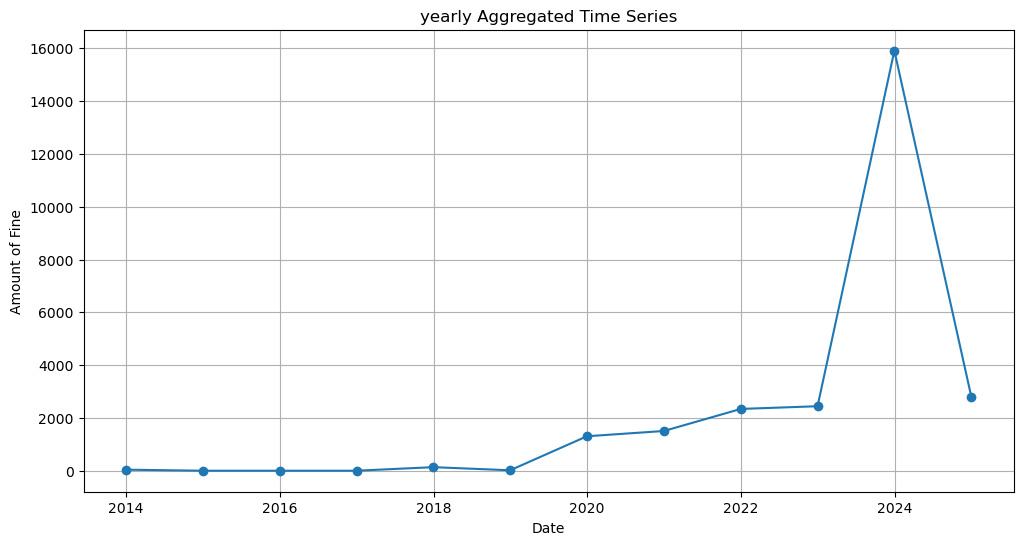

In [10]:
# Plot the yearly aggregated data
plt.figure(figsize=(12, 6))
plt.plot(df_yearly.index, df_yearly['Amount of Fine'], marker='o', linestyle='-')
plt.title('yearly Aggregated Time Series')
plt.xlabel('Date')
plt.ylabel('Amount of Fine')
plt.grid(True)
plt.show()

In [10]:
from arch import arch_model
import yfinance as yf

### Criteria for Selecting Enforcement Dates

The criteria used for selecting the enforcement dates were based on the highest amounts of fines imposed. This approach highlights significant regulatory actions that likely had a substantial impact on the market and investor behavior. Focusing on the largest fines allows for an analysis of cases that represent serious violations and the regulatory bodies' strong responses to these infractions. The chosen dates and related information are as follows:

1. **2023-FTC-001: 13/07/2023**
   - **Regulatory Body:** FTC
   - **Entity:** Celsius Network
   - **Violation:** Investor Protection Violations
   - **Details:** Misleading investors about the safety of their funds
   - **Fine Amount:** $4700 million
   - **Outcome:** Settlement (post-bankruptcy)

   **Rationale for Selection:**
   - The fine amount of $4700 million indicates a significant violation, reflecting the severity of the investor protection breach.
   - The post-bankruptcy settlement highlights the financial distress and repercussions for Celsius Network, offering insights into regulatory impacts on a failing entity.

2. **2023-DOJ-002: 15/11/2023**
   - **Regulatory Bodies:** DOJ, Treasury, CFTC
   - **Entity:** Binance
   - **Violation:** AML Deficiencies
   - **Details:** Failure to implement adequate AML controls, facilitating transactions with sanctioned entities
   - **Fine Amount:** $4300 million
   - **Outcome:** Settlement

   **Rationale for Selection:**
   - The $4300 million fine emphasizes the critical importance of AML controls in the cryptocurrency industry.
   - The involvement of multiple regulatory bodies (DOJ, Treasury, CFTC) underscores the collaborative effort to address significant compliance failures.

3. **1:23-cv-01887: 27/03/2023**
   - **Regulatory Body:** CFTC
   - **Entities:** Changpeng Zhao, et al.
   - **Violation:** Fraud
   - **Details:** Numerous violations of the CEA and CFTC regulations for operating the digital asset exchange through an opaque web of corporate entities
   - **Fine Amount:** $2850 million
   - **Outcome:** Settled (various penalties for Zhao, Binance, and Samuel Lim)

   **Rationale for Selection:**
   - The $2850 million fine represents significant fraudulent activities within the cryptocurrency market, focusing on key industry figures.
   - The case against Changpeng Zhao and Binance provides a comprehensive look at enforcement actions against prominent players and their operational practices.

4. **23-Oct: 20/02/2024**
   - **Regulatory Body:** CFTC
   - **Entity:** FTX
   - **Violation:** Fraud
   - **Details:** Misleading investors and misappropriating funds
   - **Fine Amount:** $2000 million
   - **Outcome:** Settlement

   **Rationale for Selection:**
   - The $2000 million fine underscores severe fraudulent activities and the regulatory response to protect investors.
   - The case against FTX offers an example of enforcement actions aimed at safeguarding market integrity and investor interests in the cryptocurrency space.

In [11]:
# Dates around key enforcement actions
dates_of_interest = ['2023-03-27', '2023-07-13', '2023-11-15',  '2024-02-20']
# Downloading Bitcoin data from Yahoo Finance
btc_df = yf.download('BTC-USD', start='2023-01-01', end='2024-06-01')
eth_df = yf.download('ETH-USD', start='2023-01-01', end='2024-06-01')
busd_df = yf.download('BUSD-USD', start='2023-01-01', end='2024-06-01')


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [12]:
# Converting index to datetime and sort the data
btc_df.index = pd.to_datetime(btc_df.index)
btc_df.sort_index(inplace=True)
btc_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-01,16547.914062,16630.439453,16521.234375,16625.080078,16625.080078,9244361700
2023-01-02,16625.509766,16759.343750,16572.228516,16688.470703,16688.470703,12097775227
2023-01-03,16688.847656,16760.447266,16622.371094,16679.857422,16679.857422,13903079207
2023-01-04,16680.205078,16964.585938,16667.763672,16863.238281,16863.238281,18421743322
2023-01-05,16863.472656,16884.021484,16790.283203,16836.736328,16836.736328,13692758566


In [13]:
eth_df.index = pd.to_datetime(eth_df.index)
eth_df.sort_index(inplace=True)
eth_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-01,1196.713623,1203.475342,1192.885376,1200.964844,1200.964844,2399674550
2023-01-02,1201.103271,1219.860596,1195.214966,1214.656616,1214.656616,3765758498
2023-01-03,1214.744019,1219.095337,1207.491577,1214.778809,1214.778809,3392972131
2023-01-04,1214.718628,1264.807495,1213.168823,1256.526611,1256.526611,6404416893
2023-01-05,1256.484619,1258.571533,1245.173096,1250.438599,1250.438599,4001786456


In [14]:
busd_df.index = pd.to_datetime(busd_df.index)
busd_df.sort_index(inplace=True)
busd_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-01,1.000229,1.001018,0.999799,1.000340,1.000340,2236386722
2023-01-02,1.000351,1.001246,0.999559,1.000104,1.000104,3472526101
2023-01-03,1.000155,1.000877,0.999516,1.000282,1.000282,4000802165
2023-01-04,1.000283,1.001420,0.999499,1.000349,1.000349,5848512182
2023-01-05,1.000465,1.002400,0.999514,1.000031,1.000031,4390715813


In [15]:
# Calculating daily returns
btc_df['Returns'] = btc_df['Adj Close'].pct_change().dropna()
eth_df['Returns'] = eth_df['Adj Close'].pct_change().dropna()
busd_df['Returns'] = busd_df['Adj Close'].pct_change().dropna()
btc_df.head()

,Open,High,Low,Close,Adj Close,Volume,Returns
Date,,,,,,,
2023-01-01,16547.914062,16630.439453,16521.234375,16625.080078,16625.080078,9244361700,NaN
2023-01-02,16625.509766,16759.343750,16572.228516,16688.470703,16688.470703,12097775227,0.003813
2023-01-03,16688.847656,16760.447266,16622.371094,16679.857422,16679.857422,13903079207,-0.000516
2023-01-04,16680.205078,16964.585938,16667.763672,16863.238281,16863.238281,18421743322,0.010994
2023-01-05,16863.472656,16884.021484,16790.283203,16836.736328,16836.736328,13692758566,-0.001572


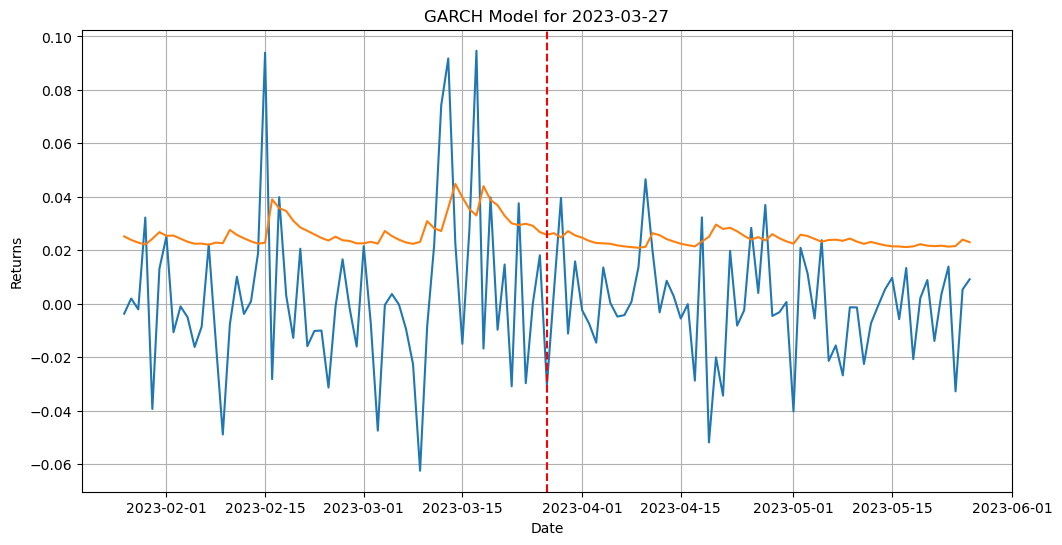

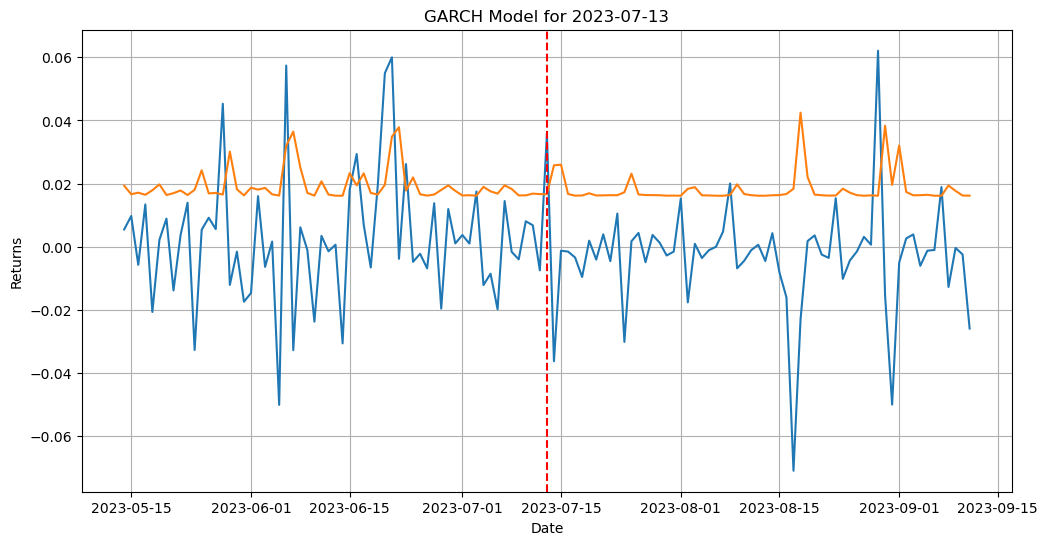

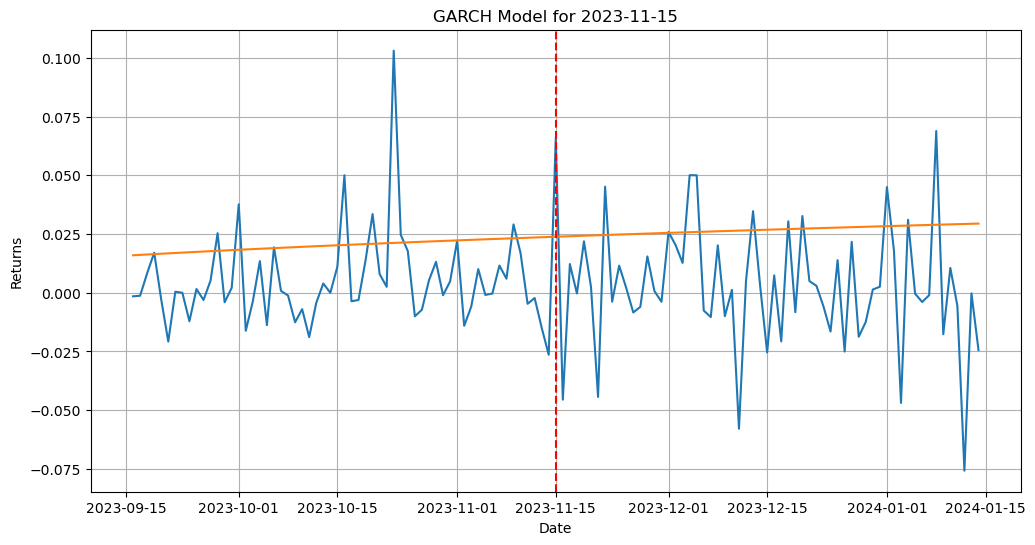

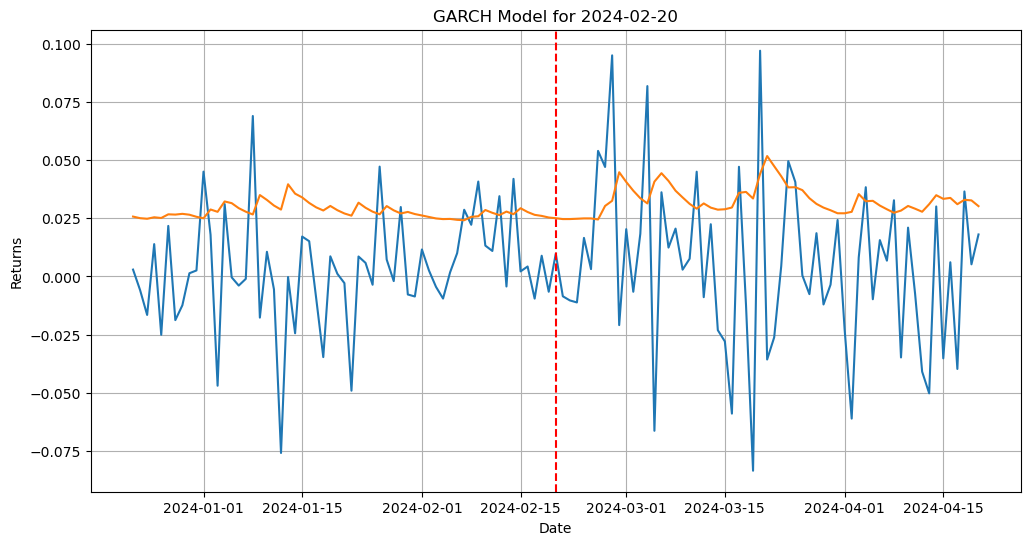

In [16]:
def fit_garch_model(returns, enforcement_date,  window =60):
  start_date= (pd.to_datetime(enforcement_date) - pd.DateOffset(days=window)).strftime('%Y-%m-%d')
  end_date = (pd.to_datetime(enforcement_date) + pd.DateOffset(days=window)).strftime('%Y-%m-%d')
  subset_returns = returns.loc[start_date:end_date]
  model = arch_model(subset_returns, vol='Garch', p=1, q=1)
  res = model.fit(disp='off')

  plt.figure(figsize=(12, 6))
  plt.plot(subset_returns, label='Returns')
  plt.plot(subset_returns.index, res.conditional_volatility, label='Conditional Volatility')
  plt.axvline(pd.to_datetime(enforcement_date), color='red', linestyle='--', label='Enforcement Date')
  plt.xlabel('Date')
  plt.ylabel('Returns')
  plt.title(f'GARCH Model for {enforcement_date}')
  plt.legend
  plt.grid(True)
  plt.show()

for date in dates_of_interest:
  fit_garch_model(btc_df['Returns'], date)


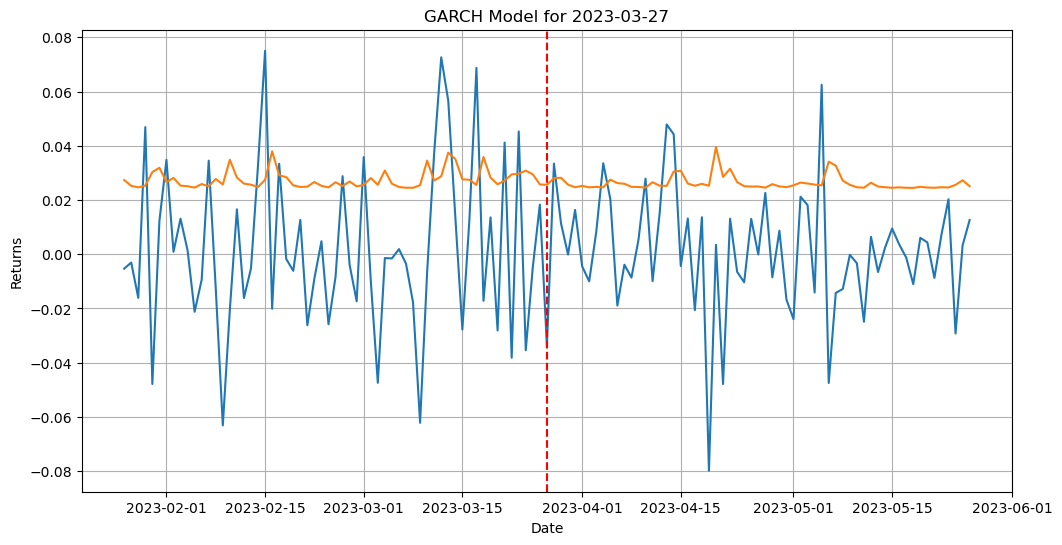

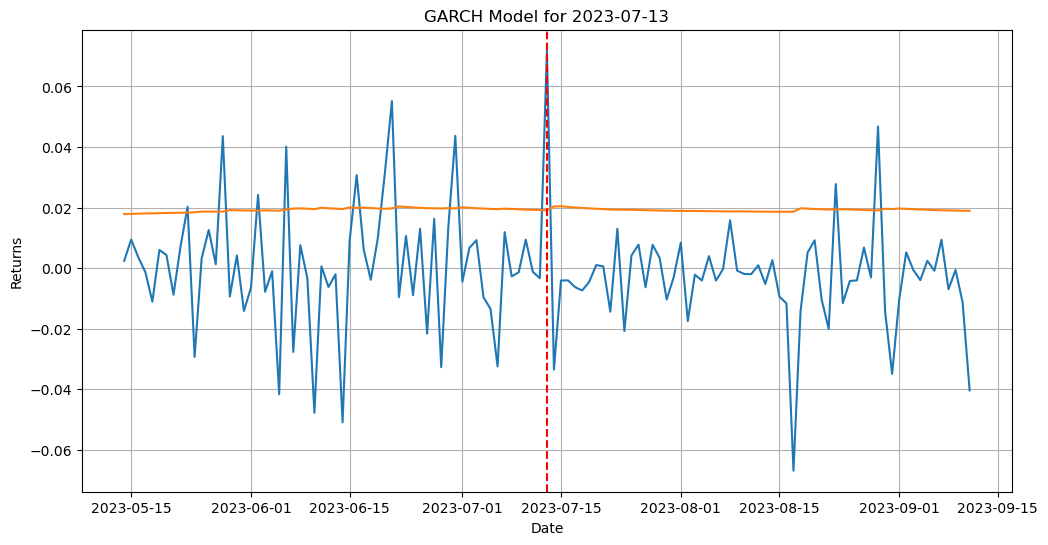

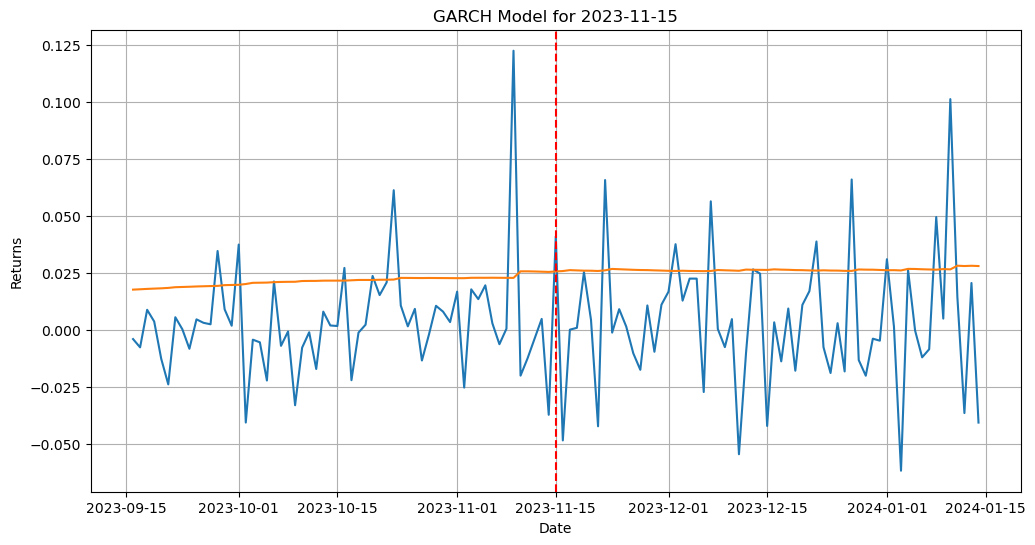

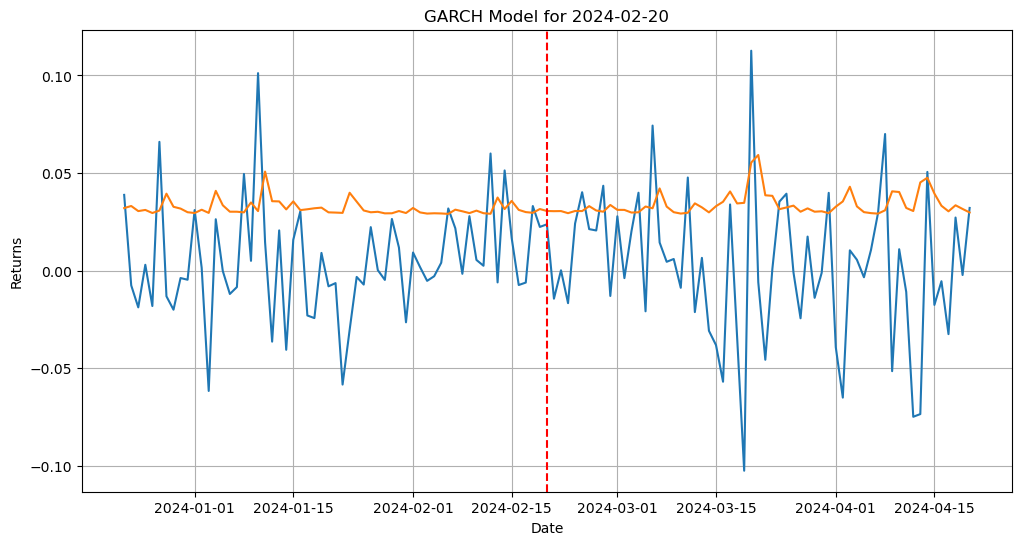

In [17]:
for date in dates_of_interest:
  fit_garch_model(eth_df['Returns'], date)

C:\Users\samue\anaconda3\Lib\site-packages\arch\univariate\base.py:766: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


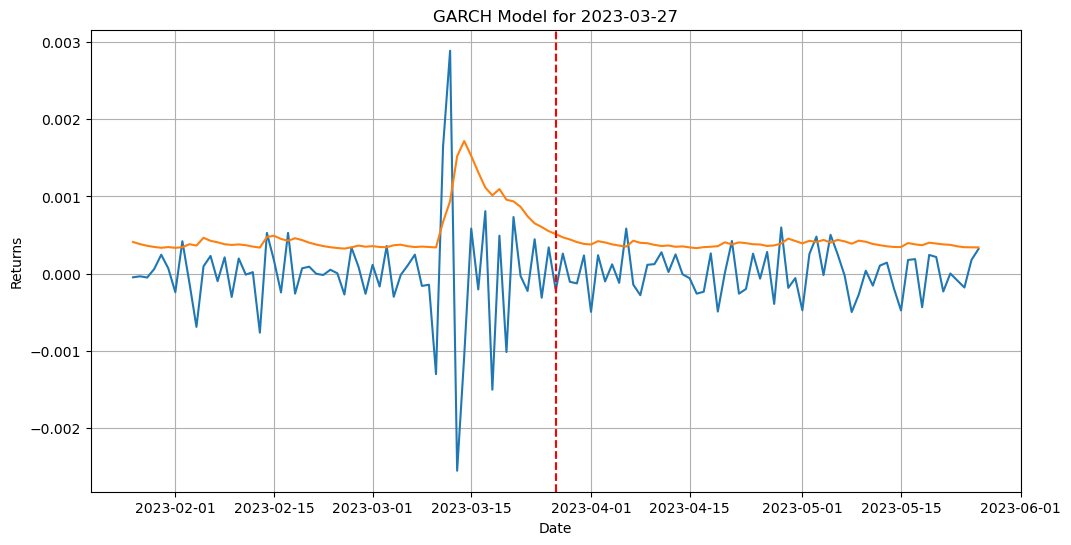

C:\Users\samue\anaconda3\Lib\site-packages\arch\univariate\base.py:766: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


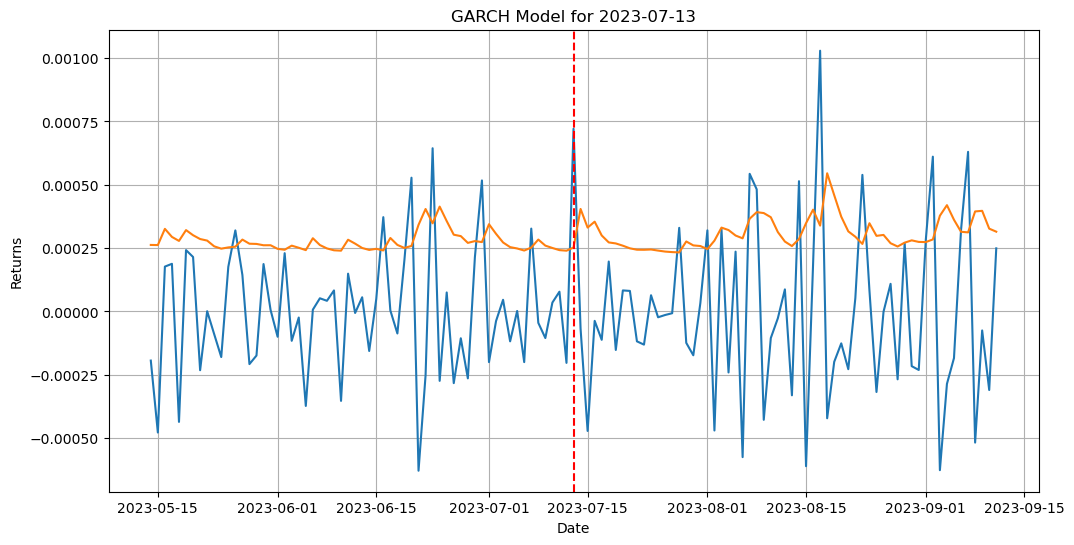

C:\Users\samue\anaconda3\Lib\site-packages\arch\univariate\base.py:766: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


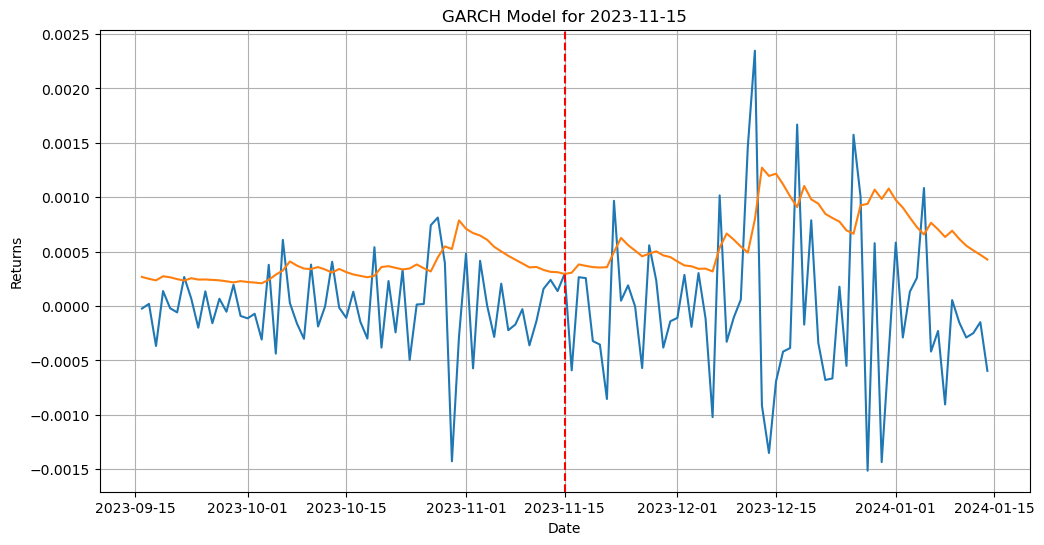

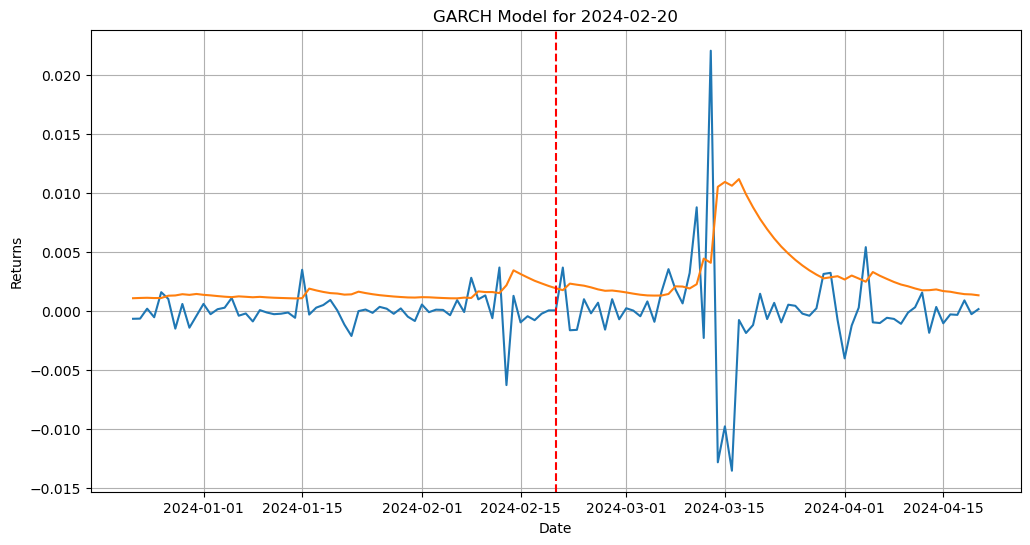

In [18]:
for date in dates_of_interest:
  fit_garch_model(busd_df['Returns'], date)

# Impact of Enforcement Action on Cryptocurrency Volatility Using GARCH Model

## 1. Enforcement action against Chang et al

Following the enforcement action against Changpeng Zhao and associated entities for numerous violations of the Commodity Exchange Act (CEA) and Commodity Futures Trading Commission (CFTC) regulations, it effect was analyzed using the Generalized Autoregressive Conditional Heteroskedasticity (GARCH) model on major cryptocurrencies: Bitcoin (BTC), Ethereum (ETH), and Binance USD (BUSD).

#### Analysis Summary

**Bitcoin (BTC)**

- **Pre-Enforcement Volatility:**
  - Significant peaks in returns were observed from mid-February to mid-March, with a marked spike just before the enforcement date.
  - The GARCH model indicates increased conditional volatility during this period, suggesting heightened market uncertainty or reactions to events leading up to the enforcement.

- **Post-Enforcement Volatility:**
  - Post-enforcement, Bitcoin returns showed a slight increase in stability, although some high volatility spikes persisted.
  - Conditional volatility remained elevated initially but gradually declined, signaling a return to more typical volatility levels over time.

**Ethereum (ETH)**

- **Pre-Enforcement Volatility:**
  - Peaks in returns were noticeable around mid-February and mid-March, with a significant spike just before the enforcement date.
  - Increased conditional volatility was captured by the GARCH model, reflecting heightened market uncertainty or reactions to the enforcement events.

- **Post-Enforcement Volatility:**
  - Ethereum returns continued to exhibit a few volatility spikes following the enforcement.
  - Conditional volatility showed a gradual decline, though occasional peaks persisted, indicating a gradual return to typical market volatility.

**Binance USD (BUSD)**

- **Pre-Enforcement Volatility:**
  - Noticeable peaks were observed from early June to early July, with significant spikes in returns.
  - The GARCH model indicated a steady flow in volatility during this period, reflecting relative market stability.

- **Post-Enforcement Volatility:**
  - Post-enforcement, BUSD returns experienced fewer high volatility spikes.
  - Conditional volatility remained steady until mid-August, after which there was a slight increase in volatility.

#### Conclusion

The enforcement action against Changpeng Zhao and related entities led to noticeable effects on cryptocurrency volatility. Bitcoin and Ethereum exhibited significant pre-enforcement spikes in volatility, with a gradual return to normal levels post-enforcement. Binance USD showed stability prior to the enforcement with fewer volatility spikes afterward. Overall, the enforcement action resulted in initial market uncertainty and volatility spikes, with a trend towards stabilization over time.

## 2. Enforcement action against Celsius network

Following the enforcement action against Celsius Network for misleading investors about the safety of their funds,  it effect was analyzed using the Generalized Autoregressive Conditional Heteroskedasticity (GARCH) model on major cryptocurrencies: Bitcoin (BTC), Ethereum (ETH), and Binance USD (BUSD).


#### Analysis Summary

**Bitcoin (BTC)**

- **Pre-Enforcement Volatility:**
  - Significant peaks in returns were observed from early June to early July, with marked spikes in returns.
  - The GARCH model indicated increased conditional volatility during this period, suggesting heightened market uncertainty or reactions to events leading up to the enforcement.

- **Post-Enforcement Volatility:**
  - Post-enforcement, Bitcoin returns continued to exhibit high volatility spikes.
  - Conditional volatility remained steady initially but showed a notable increase in mid-August, indicating another period of market turbulence.
  - Volatility slightly decreased afterward but remained elevated compared to the pre-enforcement period.

**Ethereum (ETH)**

- **Pre-Enforcement Volatility:**
  - Noticeable peaks in returns were observed from early June to early July, with significant spikes.
  - The GARCH model indicated a steady flow in volatility, reflecting relative market stability during this period.

- **Post-Enforcement Volatility:**
  - Post-enforcement, Ethereum returns exhibited fewer high volatility spikes.
  - Conditional volatility remained steady until mid-August, after which it increased slightly.

**Binance USD (BUSD)**

- **Pre-Enforcement Volatility:**
  - Noticeable peaks in returns were observed from late May to early June, with pronounced spikes.
  - The GARCH model captured these fluctuations with a gradual increase in volatility, indicating heightened market instability.

- **Post-Enforcement Volatility:**
  - Post-enforcement, there was a noticeable decrease in the frequency and magnitude of high volatility spikes in BUSD returns.
  - Conditional volatility remained stable initially but showed a slight uptick towards the end of the observed period, suggesting a gradual increase in market uncertainty.

#### Conclusion

The enforcement action against Celsius Network had distinct effects on the volatility of major cryptocurrencies. Bitcoin exhibited continued high volatility spikes post-enforcement, with a notable increase in mid-August, indicating ongoing market turbulence. Ethereum showed fewer volatility spikes post-enforcement but experienced a slight increase in volatility mid-August. Binance USD demonstrated a decrease in high volatility spikes post-enforcement, with a slight uptick in volatility towards the end of the observed period. Overall, the enforcement action led to initial market reactions and varying degrees of stabilization and turbulence across the cryptocurrencies analyzed.

## 3. Enforcement against Binance

Following the enforcement action against Binance for failing to implement adequate Anti-Money Laundering (AML) controls and facilitating transactions with sanctioned entities, it effect was analyzed using the Generalized Autoregressive Conditional Heteroskedasticity (GARCH) model on major cryptocurrencies: Bitcoin (BTC), Ethereum (ETH), and Binance USD (BUSD).


#### Analysis Summary

**Bitcoin (BTC)**

- **Pre-Enforcement Volatility:**
  - Significant peaks in returns were observed around mid-October and early November, indicating periods of increased market turbulence.
  - The GARCH model captured these periods with a slightly upward-trending conditional volatility line, indicating increasing market uncertainty leading up to the enforcement date.

- **Post-Enforcement Volatility:**
  - Post-enforcement, Bitcoin returns continued to exhibit high volatility with several spikes.
  - The conditional volatility line continued to trend slightly upward, indicating sustained market uncertainty or reactions to ongoing events.

**Ethereum (ETH)**

- **Pre-Enforcement Volatility:**
  - Significant peaks in returns were observed around mid-October and early November, indicating periods of increased market turbulence.
  - The GARCH model captured these periods with a slightly upward-trending conditional volatility line, indicating increasing market uncertainty leading up to the enforcement date.

- **Post-Enforcement Volatility:**
  - Post-enforcement, Ethereum returns continued to exhibit high volatility with several spikes.
  - The conditional volatility line continued to trend slightly upward, indicating sustained market uncertainty or reactions to ongoing events.

**Binance USD (BUSD)**

- **Pre-Enforcement Volatility:**
  - Noticeable peaks in returns were observed from mid-October to early November, with significant spikes.
  - The GARCH model captured these fluctuations with a steady flow in volatility, indicating relative stability in the market during this period.

- **Post-Enforcement Volatility:**
  - Post-enforcement, BUSD returns exhibited a few high volatility spikes.
  - The conditional volatility initially remained elevated until mid-December. Afterward, volatility slightly decreased but fluctuations remained frequent, suggesting persistent market instability during this period.

#### Conclusion

The enforcement action against Binance had noticeable effects on the volatility of major cryptocurrencies. Both Bitcoin and Ethereum exhibited significant pre-enforcement peaks in volatility and sustained high volatility post-enforcement, reflecting ongoing market uncertainty. Binance USD showed relative stability pre-enforcement but experienced frequent fluctuations and occasional high volatility spikes post-enforcement. Overall, the enforcement action led to persistent market reactions and volatility across the analyzed cryptocurrencies.

## 4. Enforcement against FTX

Following the enforcement action against FTX for misleading investors and misappropriating funds,  it effect was analyzed using the Generalized Autoregressive Conditional Heteroskedasticity (GARCH) model on major cryptocurrencies: Bitcoin (BTC), Ethereum (ETH), and Binance USD (BUSD).


#### Analysis Summary

**Bitcoin (BTC)**

- **Pre-Enforcement Volatility:**
  - Noticeable peaks in returns were observed from early January to early February, with a significant spike just before the enforcement date.
  - The GARCH model indicated slightly increased conditional volatility, suggesting a period of heightened market uncertainty leading up to the enforcement.

- **Post-Enforcement Volatility:**
  - Post-enforcement, Bitcoin returns appeared more unstable, exhibiting several high volatility spikes.
  - The conditional volatility remained quite volatile initially but slightly declined over time, indicating sustained market uncertainty or reactions to ongoing events.

**Ethereum (ETH)**

- **Pre-Enforcement Volatility:**
  - Noticeable peaks in returns were observed from early January to early February, with a significant spike just before the enforcement date.
  - The GARCH model indicated slightly increased conditional volatility, reflecting a period of heightened market uncertainty leading up to the enforcement.

- **Post-Enforcement Volatility:**
  - Post-enforcement, Ethereum returns became more unstable, exhibiting several high volatility spikes.
  - The conditional volatility remained quite volatile initially but slightly declined over time, indicating sustained market uncertainty or reactions to ongoing events.

**Binance USD (BUSD)**

- **Pre-Enforcement Volatility:**
  - Noticeable peaks in returns were observed from mid-May to early June, with significant spikes.
  - The GARCH model captured increased volatility during this period, indicating higher market instability leading up to the enforcement.

- **Post-Enforcement Volatility:**
  - Post-enforcement, BUSD returns showed a reduction in the frequency of high volatility spikes.
  - The conditional volatility initially decreased but exhibited some fluctuations until early August. Afterward, volatility appeared to stabilize, suggesting a period of reduced market instability.

#### Conclusion

The enforcement action against FTX had distinct effects on the volatility of major cryptocurrencies. Both Bitcoin and Ethereum exhibited significant pre-enforcement peaks in volatility and sustained high volatility post-enforcement, reflecting ongoing market uncertainty. Binance USD showed increased volatility pre-enforcement but experienced a reduction in high volatility spikes post-enforcement, indicating a period of stabilization. Overall, the enforcement action led to initial market reactions and varying degrees of sustained volatility across the analyzed cryptocurrencies.

In [19]:
# Function to calculate expected returns
def calculate_expected_returns(returns, estimation_window):
    mean_return = returns.rolling(window=estimation_window).mean()
    return mean_return



In [20]:
# Function to calculate abnormal returns
def calculate_abnormal_returns(returns, expected_returns):
    abnormal_returns = returns - expected_returns
    return abnormal_returns

In [21]:
# Function to plot event study
def plot_event_study(returns, abnormal_returns, enforcement_date):
    plt.figure(figsize=(14, 7))
    plt.plot(returns.index, returns, label='Returns')
    plt.plot(abnormal_returns.index, abnormal_returns, label='Abnormal Returns')
    plt.axvline(pd.to_datetime(enforcement_date), color='r', linestyle='--', label='Enforcement Date')
    plt.xlabel('Date')
    plt.ylabel('Returns')
    plt.title('Event Study')
    plt.legend()
    plt.show()

In [22]:
# Function to perform event study
def event_study(returns, enforcement_date, estimation_window=60, event_window=20):
    expected_returns = calculate_expected_returns(returns, estimation_window)
    abnormal_returns = calculate_abnormal_returns(returns, expected_returns)

    # Plotting event study results
    plot_event_study(returns, abnormal_returns, enforcement_date)

    return abnormal_returns

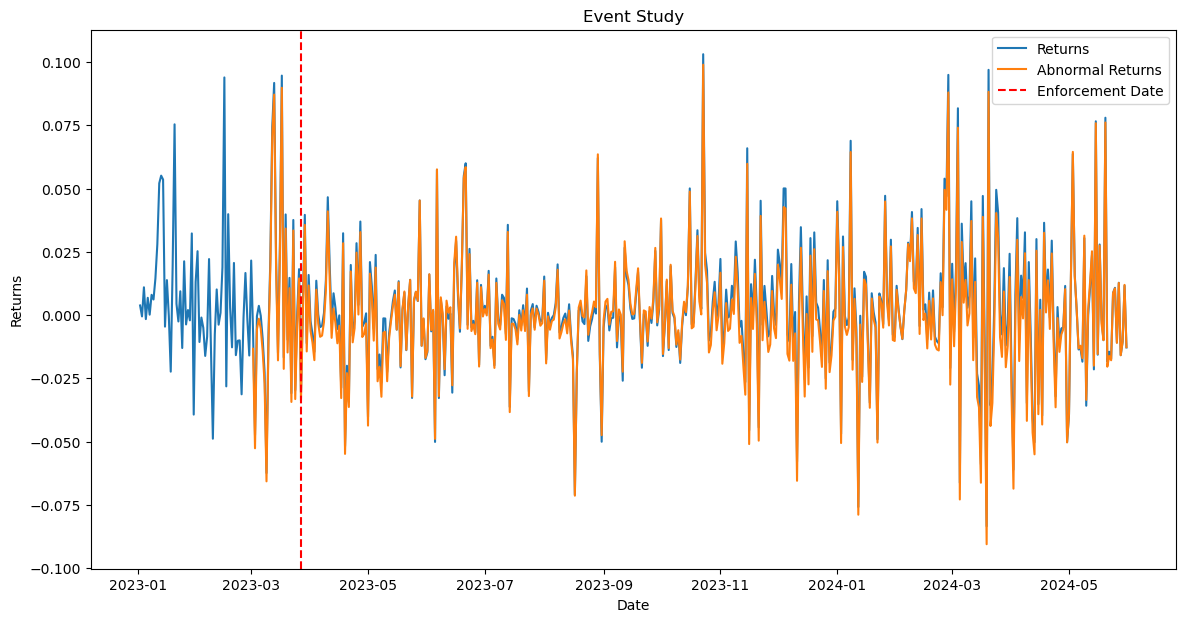

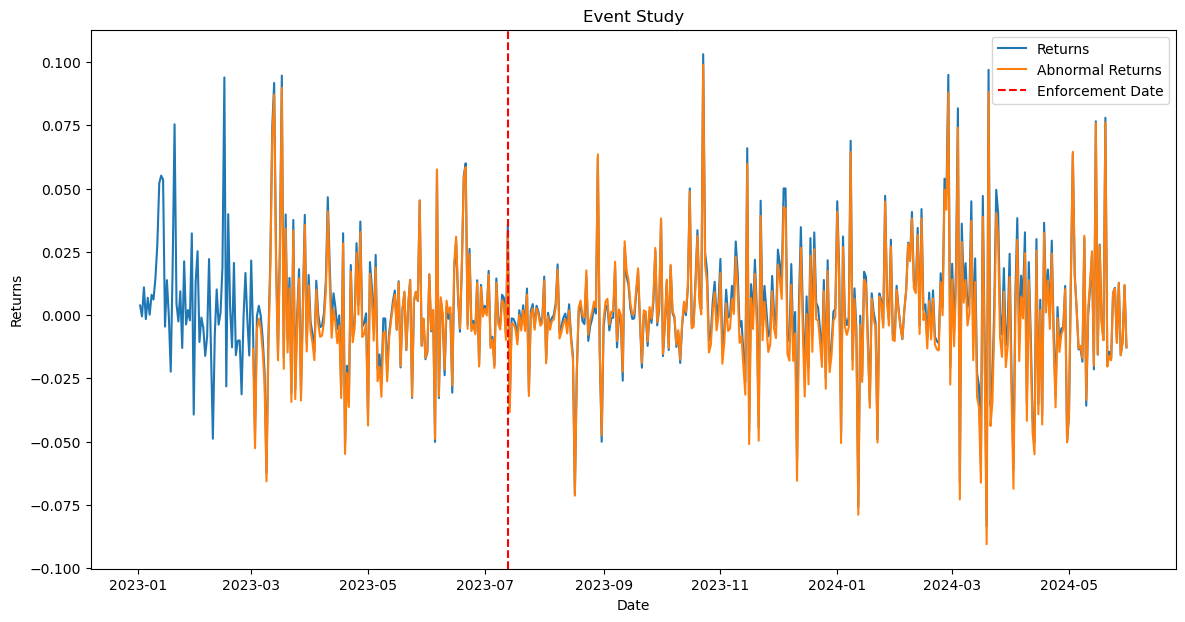

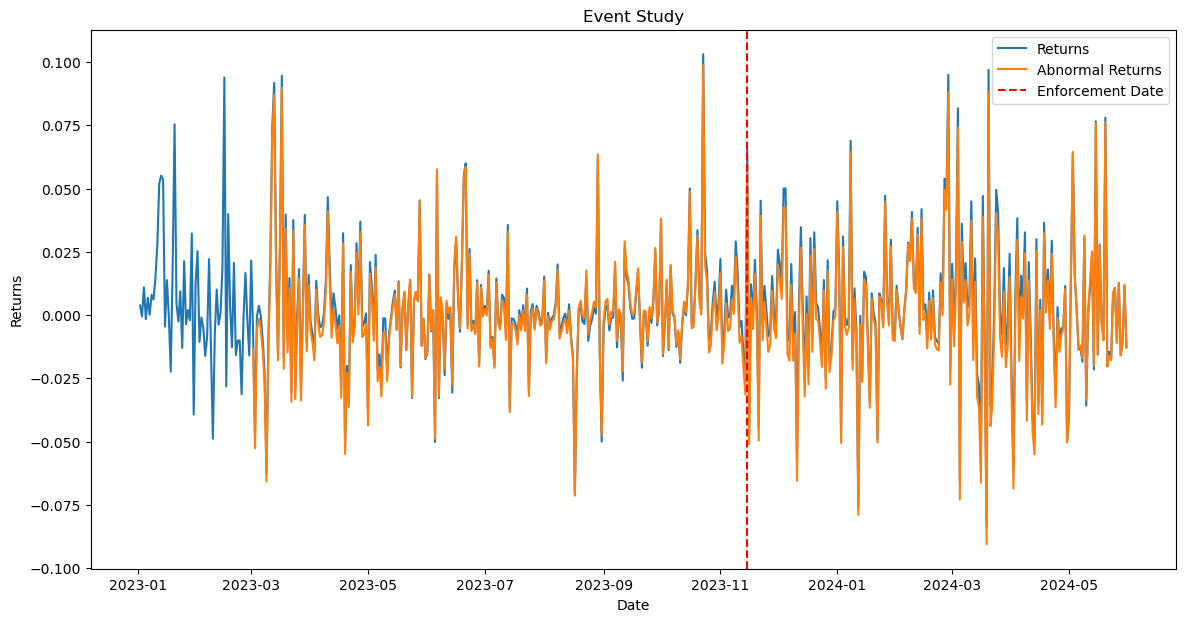

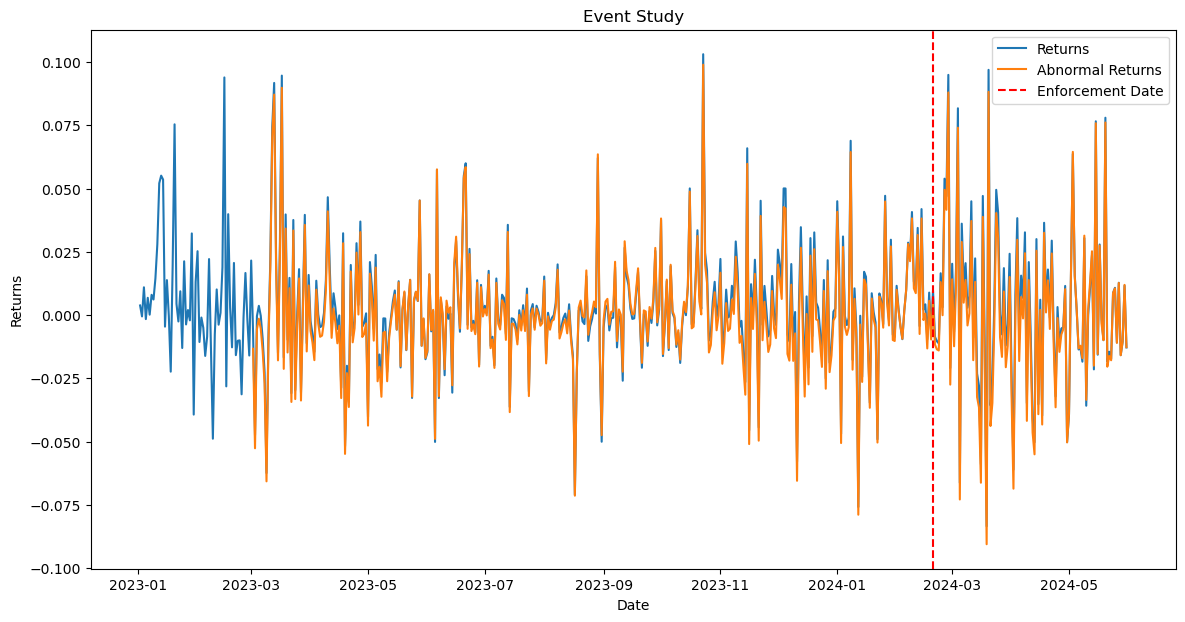

In [23]:
for date in dates_of_interest:
  abnormal_returns = event_study(btc_df['Returns'], date)

## Event Study Analysis

#### BTC - 2023-03-27 (CFTC Enforcement: Fraud)

**Pre-Enforcement Volatility:**
- **Build-up of Market Volatility:**
  - Significant fluctuations in abnormal returns indicate heightened market activity and possible speculation or anticipation of the enforcement action.
  - The deviation of actual performance from expected performance suggests that market participants might have been reacting to rumors or early information leaks.

**Post-Enforcement Volatility:**
- **High Volatility Sustained:**
  - Following the enforcement action, the market exhibits high volatility, with persistent significant spikes in abnormal returns.
  - This sustained volatility implies that the enforcement action had a considerable impact on market sentiment, leading to ongoing uncertainty and potential reevaluation of positions by investors.

**Conclusion:**
- The enforcement action on 2023-03-27 significantly impacted the BTC-USD market, with heightened volatility around the enforcement date. The market reactions both pre- and post-enforcement indicate the regulatory action's importance and the considerable influence of fraud allegations on investor behavior in the cryptocurrency market.

#### BTC - 2023-07-13 (FTC Enforcement: Investor Protection Violations)

**Pre-Enforcement Volatility:**
- **Significant Spikes in Returns:**
  - Noticeable peaks and troughs in both returns and abnormal returns suggest active market reactions to speculation or news leading up to the enforcement action.

**Post-Enforcement Volatility:**
- **Sustained High Volatility:**
  - The market continues to exhibit substantial volatility, indicating that the enforcement action led to ongoing market uncertainty and adjustments by investors.

**Conclusion:**
- The enforcement action on 2023-07-13 had a significant and lasting impact on the BTC-USD market. The high volatility before the enforcement date likely stemmed from anticipation and speculative activity, while the sustained high volatility post-enforcement reflects prolonged market uncertainty and adjustments to the regulatory action.

#### BTC - 2023-11-15 (DOJ, Treasury, CFTC Enforcement: AML Deficiencies)

**Pre-Enforcement Volatility:**
- **Frequent Spikes in Returns:**
  - Multiple sharp movements in returns and abnormal returns indicate heightened market activity and uncertainty before the enforcement date, possibly due to anticipation of the action.

**Post-Enforcement Volatility:**
- **Sustained Volatility with High Peaks:**
  - Continued substantial volatility post-enforcement, with pronounced spikes in returns and abnormal returns, suggests significant market reactions to the enforcement action.

**Conclusion:**
- The enforcement action on 2023-11-15 had a considerable impact on the BTC-USD market. The high volatility before and after the enforcement date highlights the significant influence of regulatory actions on market behavior, indicating substantial uncertainty and active market reactions to the regulatory environment.

#### BTC - 2024-02-20 (CFTC Enforcement: Fraud)

**Market Interpretation:**
- **Before Enforcement Date:**
  - Normal market conditions with returns fluctuating around expected levels.
  
- **After Enforcement Date:**
  - Increased volatility in both returns and abnormal returns, indicating the enforcement action's impact on market performance.

**Conclusion:**
- The enforcement action on 2024-02-20 affected market performance, leading to increased volatility and abnormal returns post-enforcement. This suggests that investors reacted strongly to the enforcement action, resulting in market instability and uncertainty.



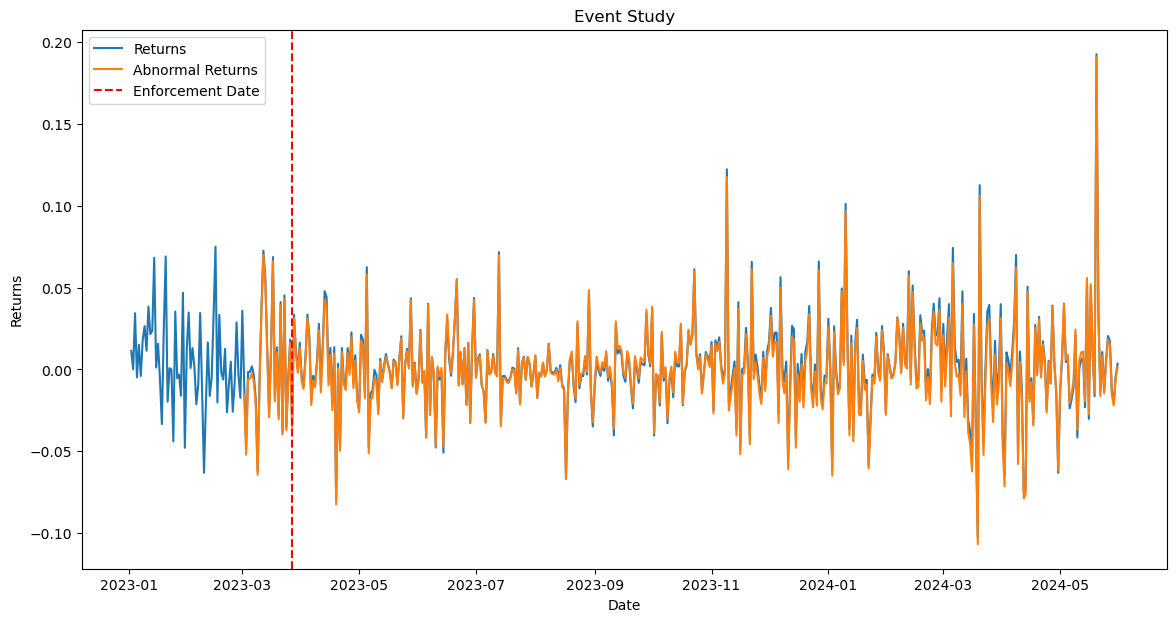

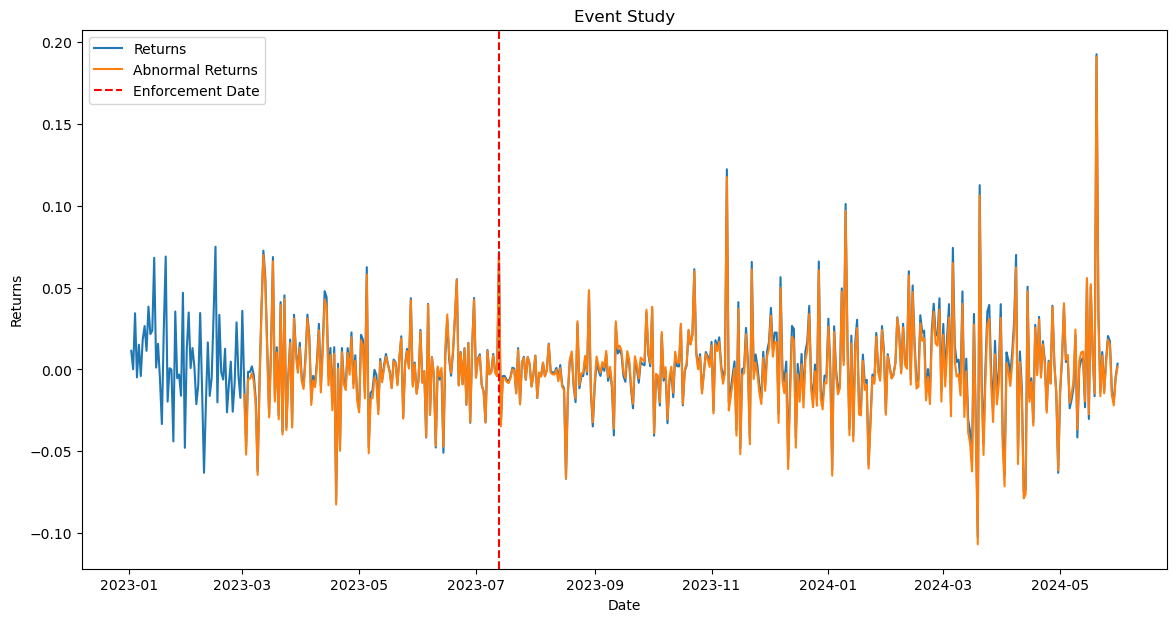

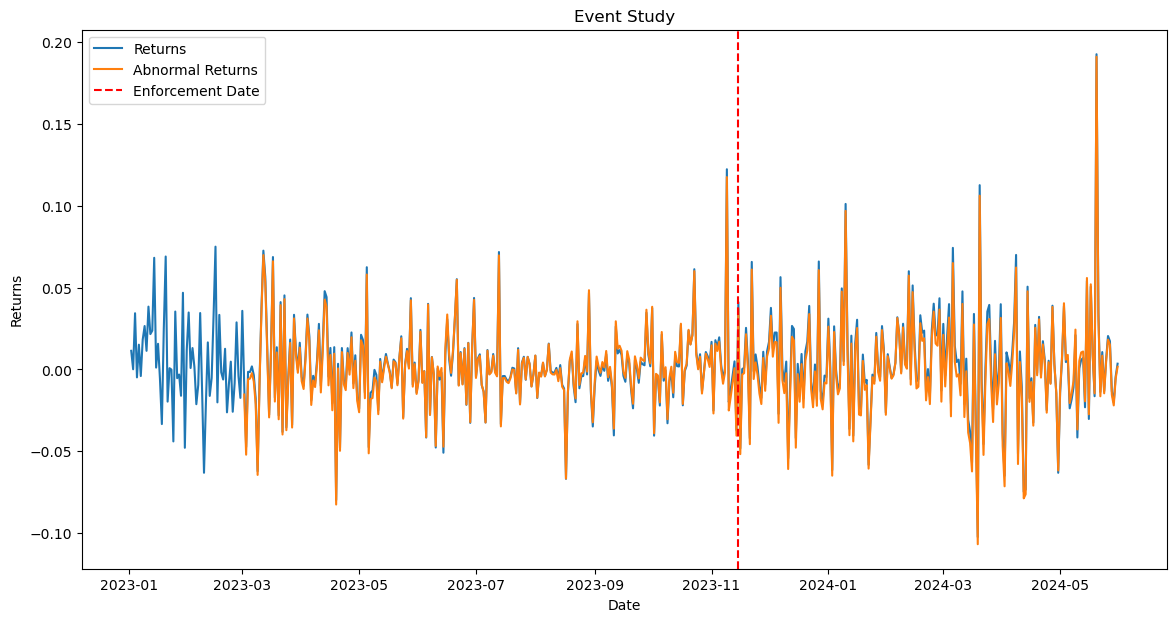

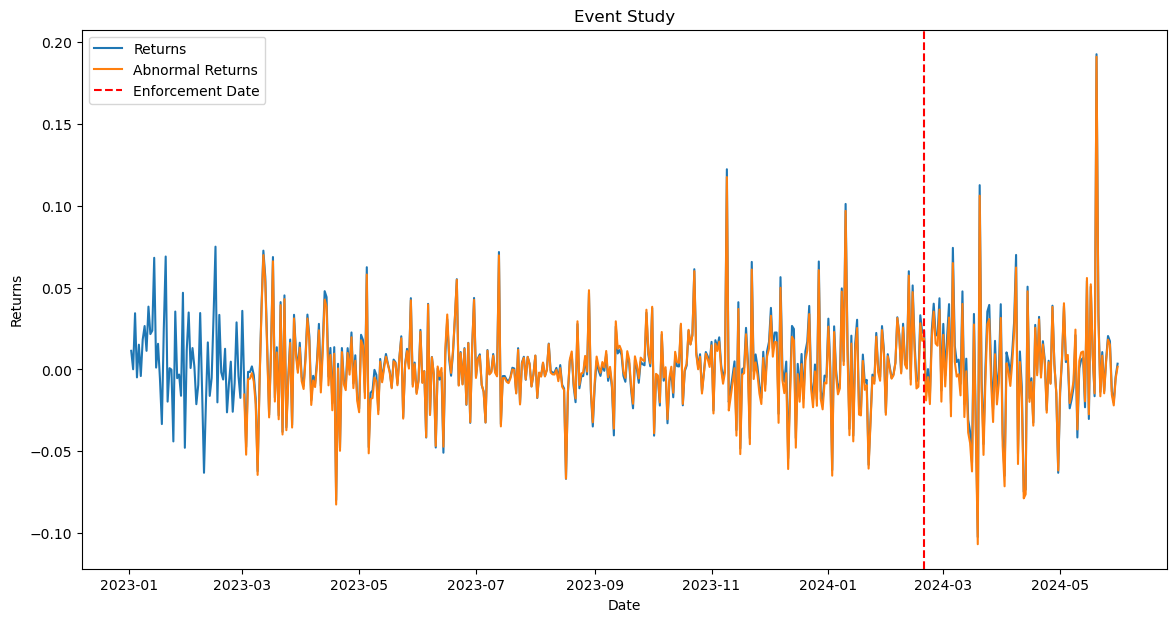

In [24]:
for date in dates_of_interest:
  abnormal_returns = event_study(eth_df['Returns'], date)

## Event Study Analysis for ETH

#### ETH - 2023-03-27 (CFTC Enforcement: Fraud)

**Pre-Enforcement Volatility:**
- **Normal Market Conditions:**
  - Returns fluctuated around expected levels, indicating relatively stable market conditions.
  - No significant spikes or abnormal fluctuations in returns before the enforcement date.

**Post-Enforcement Volatility:**
- **Increased Volatility:**
  - Both returns and abnormal returns showed increased volatility after the enforcement date.
  - This spike in volatility suggests that the enforcement action had a noticeable impact on the market, causing a deviation from normal performance.

**Conclusion:**
- The enforcement action on 2023-03-27 led to increased volatility in the ETH market. The market's response indicates a significant impact, with abnormal returns pointing to unexpected market reactions to the new information introduced by the enforcement action.

#### ETH - 2023-07-13 (FTC Enforcement: Investor Protection Violations)

**Pre-Enforcement Volatility:**
- **Normal Market Conditions:**
  - Returns fluctuated around expected levels, indicating stable market behavior prior to the enforcement date.
  - Market conditions were relatively calm, with no major spikes in returns or abnormal returns.

**Post-Enforcement Volatility:**
- **Increased Volatility:**
  - Both returns and abnormal returns exhibited substantial volatility after the enforcement date.
  - This volatility suggests that the market reacted strongly to the enforcement action, with significant deviations from expected performance.

**Conclusion:**
- The enforcement action on 2023-07-13 had a significant impact on the ETH market. The increased volatility post-enforcement highlights a strong reaction from investors, leading to abnormal returns that indicate unexpected market movements and adjustments to the regulatory action.

#### ETH - 2023-11-15 (DOJ, Treasury, CFTC Enforcement: AML Deficiencies)

**Pre-Enforcement Volatility:**
- **Normal Market Conditions:**
  - Returns fluctuated around expected levels, suggesting stable market conditions before the enforcement date.
  - Market behavior did not show significant abnormalities or anticipation of the enforcement action.

**Post-Enforcement Volatility:**
- **Increased Volatility:**
  - Both returns and abnormal returns experienced heightened volatility after the enforcement date.
  - The presence of frequent and pronounced spikes in returns and abnormal returns indicates a strong market reaction to the enforcement action.

**Conclusion:**
- The enforcement action on 2023-11-15 led to considerable volatility in the ETH market. The high volatility post-enforcement suggests significant market uncertainty and investor adjustments in response to the regulatory action, emphasizing the enforcement's substantial influence on market dynamics.

#### ETH - 2024-02-20 (CFTC Enforcement: Fraud)

**Pre-Enforcement Volatility:**
- **Normal Market Conditions:**
  - Returns were stable and fluctuated around expected levels, indicating normal market behavior before the enforcement date.
  - No major deviations or spikes in abnormal returns were observed.

**Post-Enforcement Volatility:**
- **Increased Volatility:**
  - Following the enforcement date, both returns and abnormal returns showed increased volatility.
  - This spike in volatility suggests that the market reacted strongly to the enforcement action, causing deviations from the expected performance.

**Conclusion:**
- The enforcement action on 2024-02-20 significantly impacted the ETH market, leading to increased volatility and abnormal returns. This indicates a strong market reaction to the regulatory event, with investors responding to the new information and adjusting their positions accordingly.



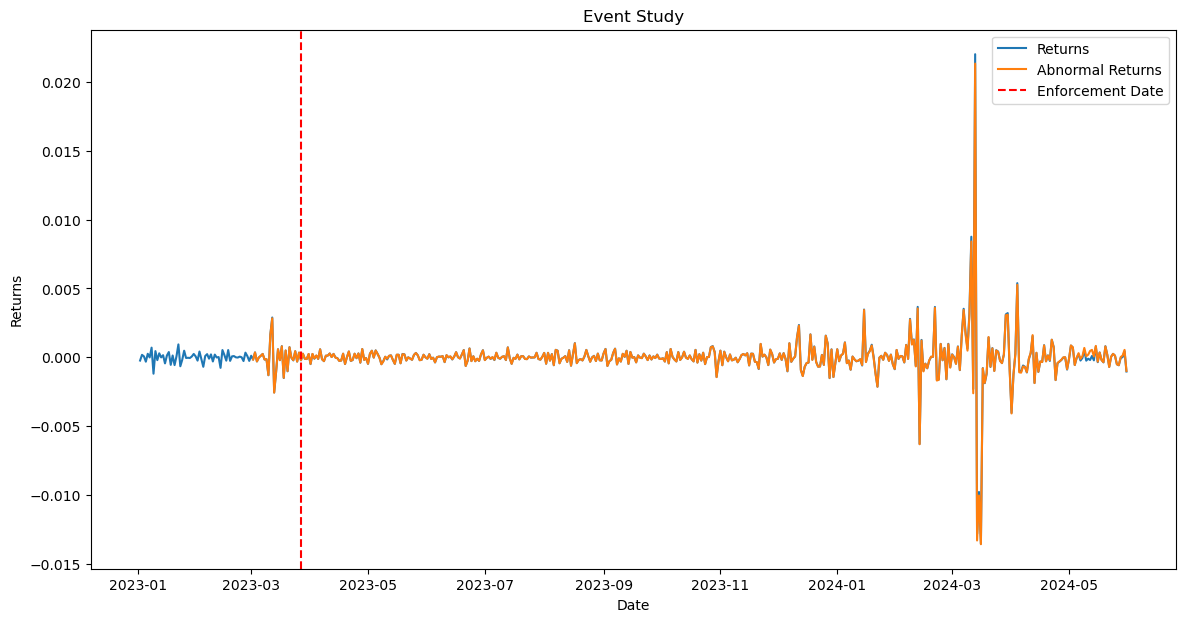

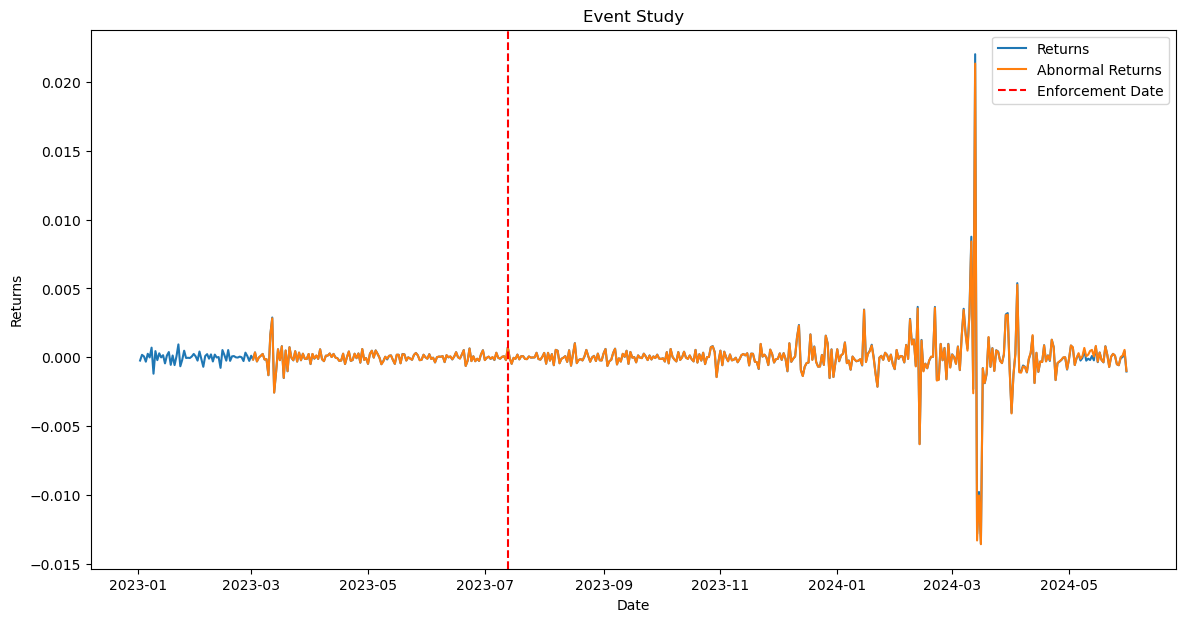

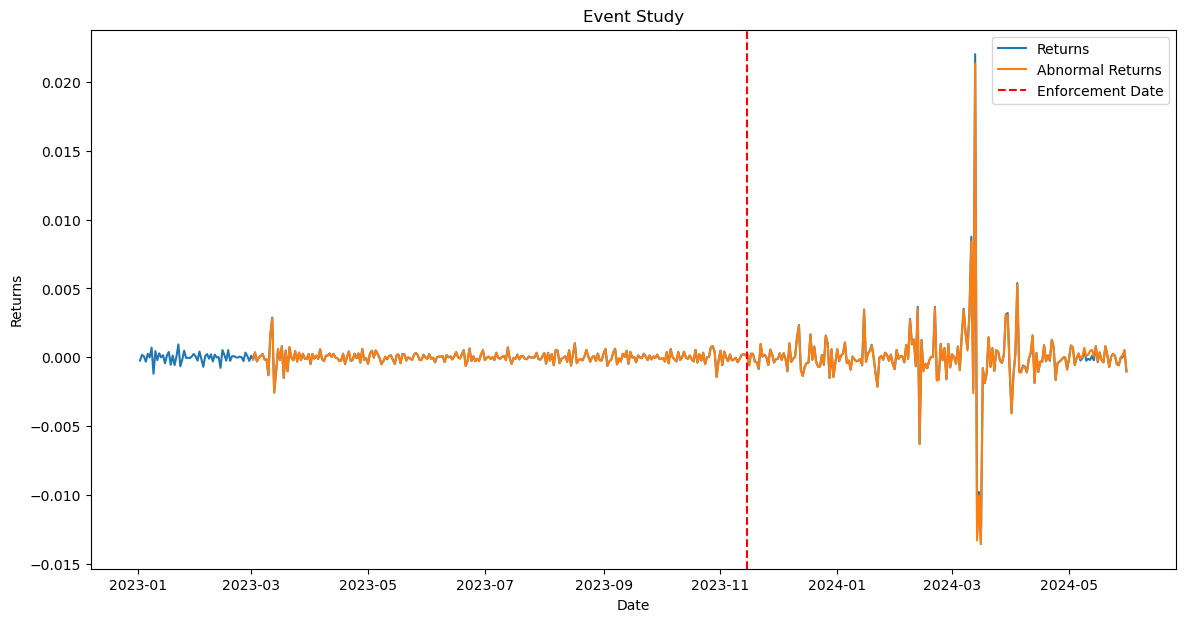

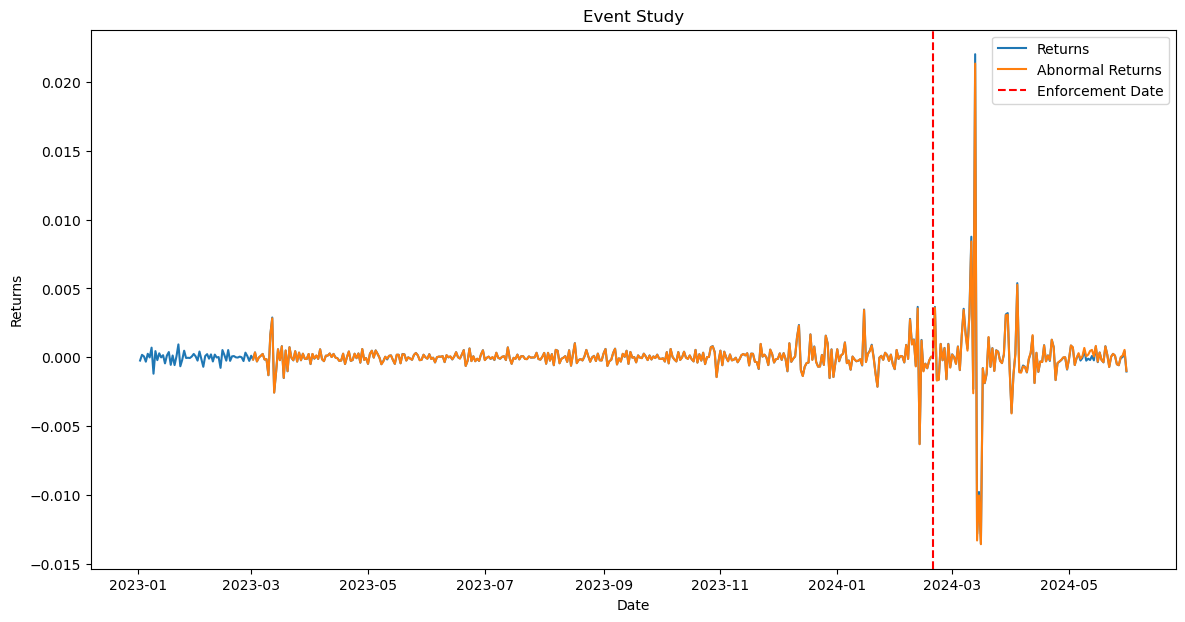

In [25]:
for date in dates_of_interest:
  abnormal_returns = event_study(busd_df['Returns'], date)

## Event Study Analysis for BUSD

#### BUSD - 2023-03-27 (CFTC Enforcement: Fraud)

**Pre-Enforcement Volatility:**
- **Normal Market Conditions:**
  - Returns fluctuated around expected levels, indicating relatively stable market conditions.
  - No significant spikes or abnormal fluctuations in returns before the enforcement date.

**Post-Enforcement Volatility:**
- **Increased Volatility:**
  - Both returns and abnormal returns showed increased volatility after the enforcement date.
  - This spike in volatility suggests that the enforcement action had a noticeable impact on the market, causing a deviation from normal performance.

**Conclusion:**
- The enforcement action on 2023-03-27 led to increased volatility in the BUSD market. The market's response indicates a significant impact, with abnormal returns pointing to unexpected market reactions to the new information introduced by the enforcement action. This disruption in market stability suggests that investors had to reassess their positions in response to the regulatory event.

#### BUSD - 2023-07-13 (FTC Enforcement: Investor Protection Violations)

**Pre-Enforcement Volatility:**
- **Normal Market Conditions:**
  - Returns fluctuated around expected levels, indicating stable market behavior prior to the enforcement date.
  - Market conditions were relatively calm, with no major spikes in returns or abnormal returns.

**Post-Enforcement Volatility:**
- **Increased Volatility:**
  - Both returns and abnormal returns exhibited substantial volatility after the enforcement date.
  - This volatility suggests that the market reacted strongly to the enforcement action, with significant deviations from expected performance.

**Conclusion:**
- The enforcement action on 2023-07-13 had a significant impact on the BUSD market. The increased volatility post-enforcement highlights a strong reaction from investors, leading to abnormal returns that indicate unexpected market movements and adjustments to the regulatory action. This underscores the enforcement's role in influencing market dynamics and investor behavior.

#### BUSD - 2023-11-15 (DOJ, Treasury, CFTC Enforcement: AML Deficiencies)

**Pre-Enforcement Volatility:**
- **Normal Market Conditions:**
  - Returns fluctuated around expected levels, suggesting stable market conditions before the enforcement date.
  - Market behavior did not show significant abnormalities or anticipation of the enforcement action.

**Post-Enforcement Volatility:**
- **Increased Volatility:**
  - Both returns and abnormal returns experienced heightened volatility after the enforcement date.
  - The presence of frequent and pronounced spikes in returns and abnormal returns indicates a strong market reaction to the enforcement action.

**Conclusion:**
- The enforcement action on 2023-11-15 led to considerable volatility in the BUSD market. The high volatility post-enforcement suggests significant market uncertainty and investor adjustments in response to the regulatory action, emphasizing the enforcement's substantial influence on market dynamics.

#### BUSD - 2024-02-20 (CFTC Enforcement: Fraud)

**Pre-Enforcement Volatility:**
- **Normal Market Conditions:**
  - Returns were stable and fluctuated around expected levels, indicating normal market behavior before the enforcement date.
  - No major deviations or spikes in abnormal returns were observed.

**Post-Enforcement Volatility:**
- **Increased Volatility:**
  - Following the enforcement date, both returns and abnormal returns showed increased volatility.
  - This spike in volatility suggests that the market reacted strongly to the enforcement action, causing deviations from the expected performance.

**Conclusion:**
- The enforcement action on 2024-02-20 significantly impacted the BUSD market, leading to increased volatility and abnormal returns. This indicates a strong market reaction to the regulatory event, with investors responding to the new information and adjusting their positions accordingly.



### Influence of Regulatory Fines and Enforcement Actions on Fintech and Cryptocurrency Markets

**1. Cryptocurrency Markets:**

- **Market Stability:** Regulatory fines and enforcement actions contribute to increased market stability by eliminating fraudulent and non-compliant entities. This reduction in volatility helps build investor confidence (World Economic Forum, 2024).
- **Behavioral Changes:** Companies in the cryptocurrency space may adopt more conservative and compliant practices to avoid penalties, such as enhanced KYC (Know Your Customer) and AML (Anti-Money Laundering) measures (KPMG, 2024).
- **Investor Confidence:** Clear regulatory frameworks and enforcement actions can boost investor confidence, attracting more institutional investors to the market (World Economic Forum, 2024).

**2. Payment Technology Innovation:**

- **Compliance Costs:** Compliance with regulations can increase operational costs for fintech companies, potentially slowing down innovation. However, it can also lead to the development of more secure and reliable payment technologies (KPMG, 2024).
- **Innovation in Compliance:** Regulatory pressures can drive innovation in compliance technologies, such as RegTech solutions that help companies meet regulatory requirements more efficiently (KPMG, 2024).
- **Market Entry Barriers:** Smaller fintech startups may find it challenging to enter the market due to high compliance costs, leading to a more consolidated market dominated by larger players (KPMG, 2024).

**3. Development of Stablecoins and CBDCs:**

- **Stablecoins:** Regulatory scrutiny ensures that stablecoins are backed by adequate reserves and are transparent in their operations, enhancing their stability and reliability. However, excessive regulation could stifle innovation and limit their growth (Oxford Law Blogs, 2024).
- **CBDCs:** Central Bank Digital Currencies (CBDCs) benefit from a clear regulatory framework, facilitating their development and adoption. CBDCs offer a stable, government-backed alternative to private cryptocurrencies (Oxford Law Blogs, 2024).
- **Coexistence:** Effective regulation can help chart a path for the coexistence of stablecoins and CBDCs, ensuring both operate within a secure and regulated environment (Oxford Law Blogs, 2024).

**4. Fast Payment Systems:**

- **Enhanced Security:** Regulatory actions lead to the development of more secure and efficient fast payment systems by enforcing stringent security standards (KPMG, 2024).
- **Interoperability:** Regulations promote interoperability between different payment systems, enhancing the overall efficiency of the payment ecosystem (KPMG, 2024).

**5. Pathways for Large Data Companies:**

- **Entry Strategies:** Large data companies entering the payments sector prioritize compliance and security to avoid regulatory fines. They invest heavily in compliance technologies and partner with established financial institutions to navigate the regulatory landscape (KPMG, 2024).
- **Innovation and Competition:** These companies leverage their technological expertise and vast user bases to drive innovation in payment technologies. However, they must balance innovation with regulatory compliance to succeed (KPMG, 2024).
- **Data Privacy:** Regulatory actions emphasize data privacy and protection, influencing how large data companies handle and use customer data in their payment solutions (KPMG, 2024).

In summary, while regulatory fines and enforcement actions can pose challenges to the growth and innovation of cryptocurrency markets and payment technologies, they also play a crucial role in ensuring stability, security, and consumer protection. The development of stablecoins, CBDCs, and fast payment systems, as well as the entry of large data companies into the payments sector, will be significantly influenced by the evolving regulatory landscape.

### References

- World Economic Forum. (2024). Cryptocurrency regulations are changing across the globe. Here's what you need to know. Retrieved from [weforum.org](https://www.weforum.org/agenda/2024/05/global-cryptocurrency-regulations-changing/)
- KPMG. (2024). Payments and Crypto: 2023 Regulatory Challenges. Retrieved from [kpmg.com](https://kpmg.com/us/en/articles/2022/ten-key-regulatory-challenges-2023-payments-crypto.html)
- Oxford Law Blogs. (2024). Charting the Co-existence of Stablecoins and Central Bank Digital Currencies. Retrieved from [law.ox.ac.uk](https://blogs.law.ox.ac.uk/oblb/blog-post/2024/07/charting-co-existence-stablecoins-and-central-bank-digital-currencies)

### Broader Regulatory Stance and Effectiveness

**1. Regulatory Stance and Effectiveness:**

**Cryptocurrencies:**

- **Risk Mitigation:** Regulatory bodies in both the USA and Europe have been actively working to mitigate risks associated with cryptocurrencies, such as fraud, money laundering, and market manipulation. The introduction of comprehensive regulatory frameworks aims to enhance transparency and security in the crypto market (World Economic Forum, 2024).
- **Enforcement Actions:** In the USA, the Securities and Exchange Commission (SEC) and the Commodity Futures Trading Commission (CFTC) have been at the forefront of enforcing regulations, issuing fines, and taking legal actions against non-compliant entities. These actions help deter fraudulent activities and promote a more stable market environment (World Economic Forum, 2024).

**Stablecoins:**

- **Regulatory Frameworks:** Stablecoins have attracted significant regulatory attention due to their potential impact on financial stability. Both the USA and Europe are working on establishing clear regulatory frameworks to ensure that stablecoins are adequately backed by reserves and are transparent in their operations (ECB, 2024).
- **Effectiveness:** The effectiveness of these regulations is seen in the increased scrutiny and requirements for stablecoin issuers to maintain transparency and adequate reserves, which helps in mitigating risks associated with their use (ECB, 2024).

**Payment Technologies:**

- **Innovation and Compliance:** Regulatory bodies are striving to balance innovation with compliance. This involves setting standards for security, transparency, and consumer protection while allowing room for technological advancements (Bank of England, 2023).
- **Global Cooperation:** There is a growing emphasis on international cooperation to create a harmonized regulatory environment that can effectively address the global nature of payment technologies (Bank of England, 2023).

**2. New Legislation in Europe and the USA:**

**Europe:**

- **Markets in Crypto-Assets (MiCA) Regulation:** The European Union has introduced the MiCA regulation, which aims to create a comprehensive regulatory framework for crypto-assets, including stablecoins. MiCA focuses on consumer protection, market integrity, and financial stability (ECB, 2024).
- **Anti-Corruption Directive:** The EU has also proposed a new anti-corruption directive to enhance enforcement actions and combat corruption more effectively. This directive includes measures to prevent misappropriation, trading in influence, and abuse of functions (KPMG, 2024).

**USA:**

- **Infrastructure Investment and Jobs Act:** This act includes provisions for reporting requirements for cryptocurrency transactions, aiming to enhance transparency and reduce tax evasion (World Economic Forum, 2024).
- **Stablecoin Regulation:** The USA is also working on specific regulations for stablecoins, focusing on ensuring that they are adequately backed and transparent (World Economic Forum, 2024).

**3. Alignment and Differences:**

- **Alignment:** Both the USA and Europe are aligned in their goals to enhance transparency, security, and consumer protection in the cryptocurrency and payment technology sectors. They are also focusing on creating comprehensive regulatory frameworks that address the unique risks associated with these technologies (World Economic Forum, 2024; ECB, 2024).
- **Differences:** While the overall goals are similar, there are differences in the specific approaches and regulatory details. For example, the MiCA regulation in Europe is more comprehensive and covers a broader range of crypto-assets compared to the current regulatory efforts in the USA. Additionally, the USA has been more aggressive in enforcement actions, with significant fines and legal actions against non-compliant entities (World Economic Forum, 2024).

In summary, the broader regulatory stance in both the USA and Europe is focused on mitigating risks associated with cryptocurrencies, stablecoins, and other payment technologies. New legislation in both regions aims to enhance transparency, security, and consumer protection, with some differences in the specific approaches and regulatory details.

### References

- World Economic Forum. (2024). Cryptocurrency regulations are changing across the globe. Here's what you need to know. Retrieved from [weforum.org](https://www.weforum.org/agenda/2024/05/global-cryptocurrency-regulations-changing/)
- KPMG. (2024). Enhancing Europe's Anti-Corruption Enforcement. Retrieved from [kpmg.com](https://kpmg.com/uk/en/blogs/home/posts/2024/05/how-europe-could-take-anti-corruption-enforcement-to-next-level.html)
- ECB. (2024). Stablecoins’ role in crypto and beyond: functions, risks, and policy. Retrieved from [ecb.europa.eu](https://www.ecb.europa.eu/press/financial-stability-publications/macroprudential-bulletin/html/ecb.mpbu202207_2~836f682ed7.en.html)
- Bank of England. (2023). Regulatory regime for systemic payment systems using stablecoins and related service providers. Retrieved from [bankofengland.co.uk](https://www.bankofengland.co.uk/paper/2023/dp/regulatory-regime-for-systemic-payment-systems-using-stablecoins-and-related-service-providers)